# Rosenbrock 

In [5]:
fn = lambda x1, x2:(1-x1)**2 + 100 *((x2-x1**2)**2)

dx1 = lambda x1, x2:-2*(1-x1) - 400*x1*(x2-x1**2)
dx2 = lambda x1, x2:200*(x2-x1**2)
norm = lambda x1, x2:(x1**2+x2**2)**.5

In [11]:
X = [(-1.0, -1.0)]

h = 1e-5
n = 100000

for i in range(n):
    x1 = X[-1][0] - h * (dx1(*X[-1])/norm(*X[-1]))
    x2 = X[-1][1] - h * (dx2(*X[-1])/norm(*X[-1]))
    X.append((x1, x2))
X[0], X[-1]

((-1.0, -1.0), (0.7676372817786352, 0.5882032831691993))

In [12]:
X = [(-1.0, -1.0)]

h = 1e-5
n = 200000

for i in range(n):
    x1 = X[-1][0] - h * (dx1(*X[-1])/norm(*X[-1]))
    x2 = X[-1][1] - h * (dx2(*X[-1])/norm(*X[-1]))
    X.append((x1, x2))
X[0], X[-1]

((-1.0, -1.0), (0.8607238212100112, 0.7402401513381506))

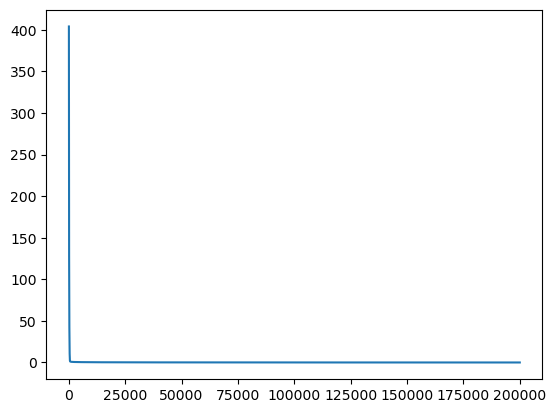

In [16]:
#그 때 x 를 가지고 그리면 어떻게 되냐면
import matplotlib.pyplot as plt

plt.plot(range(len(X)), list(map(lambda x:fn(*x), X)))

(0.0, 1.0)

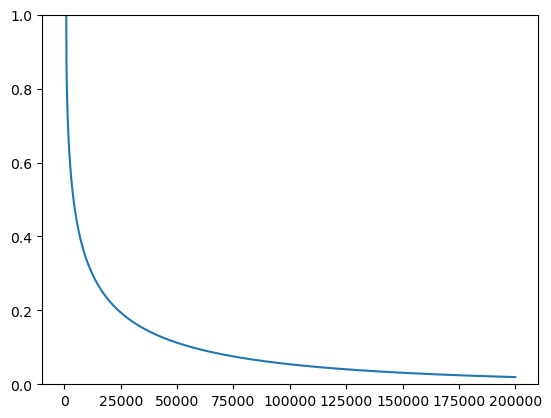

In [17]:
#스케일이 너무 작아서 저렇게 보이는거라서 스케일을 늘리면. 
plt.plot(range(len(X)), list(map(lambda x:fn(*x), X)))
plt.ylim(0,1)

In [18]:
#결국 저 위에 있던 fn 은 J ... 인거다..?
# J = fn = lambda x1, x2:(1-x1)**2 + 100 *((x2-x1**2)**2)

#무슨말인지 모르겠어요.....

In [19]:
#이제 넘파이를 써보자

In [20]:
import numpy as np

In [21]:
#데이터를 임의로 만들어보겠다.
N = 100
X = (np.random.rand(N)+np.random.rand(N))*np.pi
# np.sin(np.random.rand()*np.pi)
X.shape

(100,)

In [22]:
np.sin(X)

array([-0.99998215, -0.13528111, -0.23244327, -0.48250686, -0.13950206,
        0.83129635,  0.69805031,  0.99821886,  0.96961511,  0.09289284,
       -0.59456519, -0.99917598,  0.70903853,  0.33304346,  0.81308298,
       -0.97719029, -0.22823724, -0.61369618,  0.10286576, -0.94607605,
        0.99083846, -0.94545339,  0.64502794,  0.16555024, -0.03048677,
       -0.73800759, -0.4677116 ,  0.48798661, -0.49619084, -0.69442162,
        0.01964646,  0.67355948, -0.26606871,  0.25136443,  0.84294564,
       -0.87037061,  0.18799229,  0.6348568 , -0.88283454,  0.45260822,
        0.58144777, -0.33580358, -0.77733466, -0.91433891, -0.70359485,
       -0.64563922, -0.93048192,  0.45300453, -0.26775916, -0.95525806,
        0.0124418 ,  0.89209498, -0.93819659, -0.99870062,  0.76713576,
       -0.91792417, -0.978815  ,  0.98808059,  0.1435236 ,  0.89332638,
       -0.36816208, -0.7224546 ,  0.7237371 , -0.18762758, -0.85262454,
        0.8378306 , -0.43638987,  0.4684509 ,  0.61688017,  0.11

In [23]:
#이번에는 y도 만들어보겠다.
Y = np.zeros(N)   #zero로 N개 만큼 만든다.

Y[np.sin(X) > 0] = 1

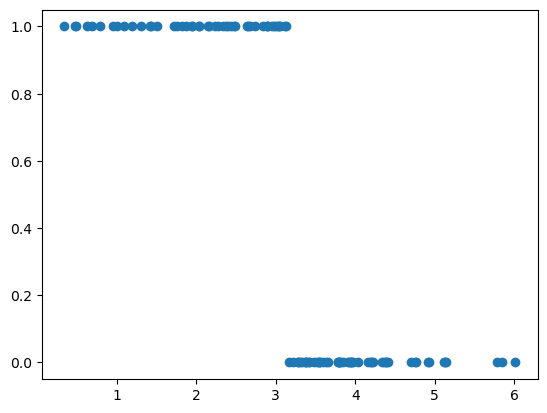

In [24]:
plt.scatter(X, Y)

In [25]:
#sin 그래프가 사이클을 그린다... 
# 1파이 구간동안 볼록 2파이 구간동안 오목한걸.. 만든거라고 한다..ㅠㅠ

In [26]:
#이 그래프를 관통하는 선을 그려주면 데이터의 경향성을 보여주는 regression 이라고 한다.

In [27]:
#이번에는 세타를 그려준다고 한다..

In [28]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [29]:
_X = X[:,np.newaxis]

In [30]:
_X.shape

(100, 1)

In [31]:
_Y = Y[:, np.newaxis]

In [32]:
np.linalg.inv(_X.T.dot(_X)).dot(_X.T).dot(_Y)

array([[0.08790564]])

In [33]:
#기울기도 하나 만들어주려고한다.
_X = np.c_[np.ones(N), _X]

In [34]:
np.linalg.inv(_X.T.dot(_X)).dot(_X.T).dot(_Y)

#1.45831407 기울기
#-0.31606746 절편
#감소하는 선의 모양일거다. 

array([[ 1.45831407],
       [-0.31606746]])

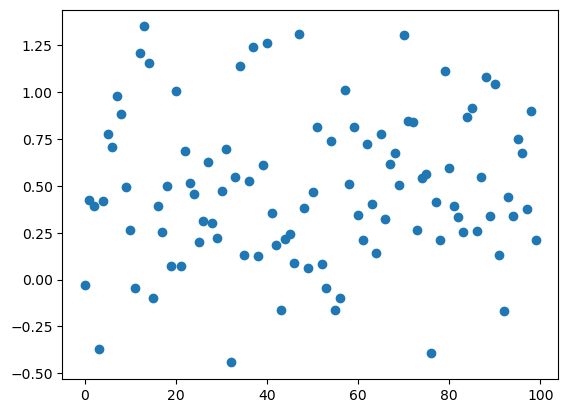

In [36]:
theta = np.linalg.inv(_X.T.dot(_X)).dot(_X.T).dot(_Y)
plt.scatter(range(N), _X.dot(theta))

In [37]:
#뭐야 이게?

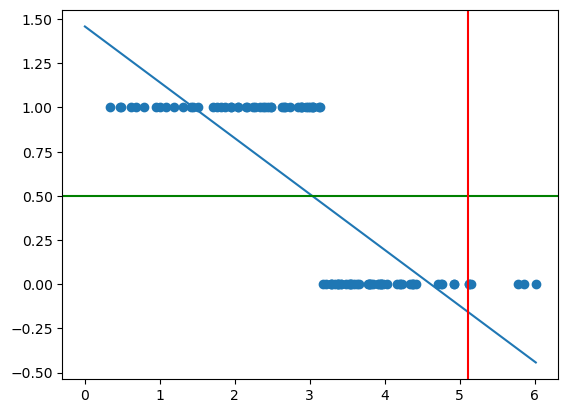

In [40]:
plt.scatter(X, Y)
plt.plot([0, X.max()], [theta[0], X.max()*theta[1]+theta[0]])
plt.axhline(.5, c='g')
plt.axvline(.5-theta[0]/theta[1], c='r')

In [41]:
theta

array([[ 1.45831407],
       [-0.31606746]])

In [42]:
#학습을 시켜보겠다. 데이터로더를 만들겠다.
# 안만드시겠다한다....하하..

In [58]:
J = lambda x, y:(y-x.dot(theta))**2
loss = lambda x, y: -2*x.T.dot(y-x.dot(theta))

In [59]:
theta = np.random.rand(2,1)

In [60]:
theta


array([[0.86505659],
       [0.27011919]])

In [61]:
_X.shape, _Y.shape

((100, 2), (100, 1))

In [65]:
h = 1e-4
epoch = 10000

history = list()

for i in range(epoch+1):
    for x, y in zip(_X,_Y):  #이렇게 되면 굉장히 extreme 한 케이스다. 배치사이즈가 1인 케이스라서.
        x = x.reshape(1,-1)
        y = y.reshape(1,-1)
        
        l = loss(x,y)
        theta = theta - h*l/np.linalg.norm(l)
        
    if i % 100 ==0:
        history.append(l)

In [66]:
theta

array([[ 1.29600682],
       [-0.27275619]])

In [81]:
def dataloader(X, Y, n=2):
    #전처리
    for i in range(len(X)-(n-1)):
        yield X[i:i+n], Y[i:i+n]

In [84]:
dataloader(_X, _Y)

<generator object dataloader at 0x00000256E834B040>

In [86]:
list(dataloader(_X, _Y))

[(array([[1.        , 4.70641448],
         [1.        , 3.27728983]]),
  array([[0.],
         [0.]])),
 (array([[1.        , 3.27728983],
         [1.        , 3.37618166]]),
  array([[0.],
         [0.]])),
 (array([[1.        , 3.37618166],
         [1.        , 5.77967078]]),
  array([[0.],
         [0.]])),
 (array([[1.        , 5.77967078],
         [1.        , 3.28155119]]),
  array([[0.],
         [0.]])),
 (array([[1.        , 3.28155119],
         [1.        , 2.16015675]]),
  array([[0.],
         [1.]])),
 (array([[1.        , 2.16015675],
         [1.        , 2.36892163]]),
  array([[1.],
         [1.]])),
 (array([[1.        , 2.36892163],
         [1.        , 1.51110255]]),
  array([[1.],
         [1.]])),
 (array([[1.        , 1.51110255],
         [1.        , 1.8179401 ]]),
  array([[1.],
         [1.]])),
 (array([[1.        , 1.8179401 ],
         [1.        , 3.04856569]]),
  array([[1.],
         [1.]])),
 (array([[1.        , 3.04856569],
         [1.        

In [92]:
#데이터 로더를 이용한 형태로 바꾼다면?
h = 1e-4
epoch = 20000

history = list()

theta = np.random.rand(2,1)

for i in range(1, epoch+1):
    for x,y in dataloader(_X, _Y, 5):
        l = loss(x,y)
        theta = theta - h*l/np.linalg.norm(l)
        
    if i % 100 ==0:
        history.append(np.mean(J(_X,_Y)))

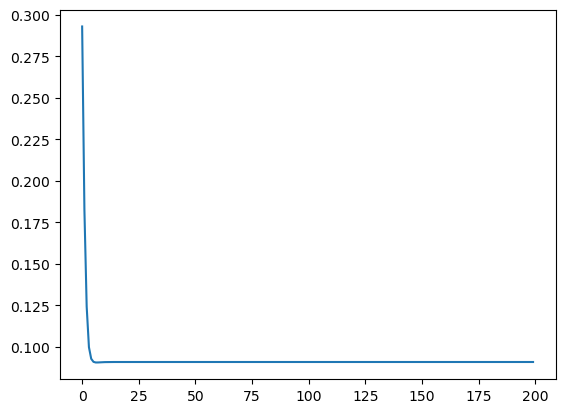

In [93]:
plt.plot(range(len(history)), history)